# Titanic 
[Kaggle](https://www.kaggle.com/competitions/titanic)

<b>The challenge </b> <br>
Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data

In [37]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

In [4]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
gender = pd.read_csv

## EDA

In [8]:
women = train.loc[train.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)

print(f"Percentage of women who survived: {rate_women}")

Percentage of women who survived: 0.7420382165605095


In [9]:
men = train.loc[train.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)

print(f"Percentage of women who survived: {rate_men}")

Percentage of women who survived: 0.18890814558058924


In [15]:
survived_passengers = train[train['Survived'] == 1]
grouped_data = survived_passengers.groupby(['Pclass', 'Sex','Survived']).size().unstack()
grouped_data

Survived        1
Pclass Sex       
1      female  91
       male    45
2      female  70
       male    17
3      female  72
       male    47

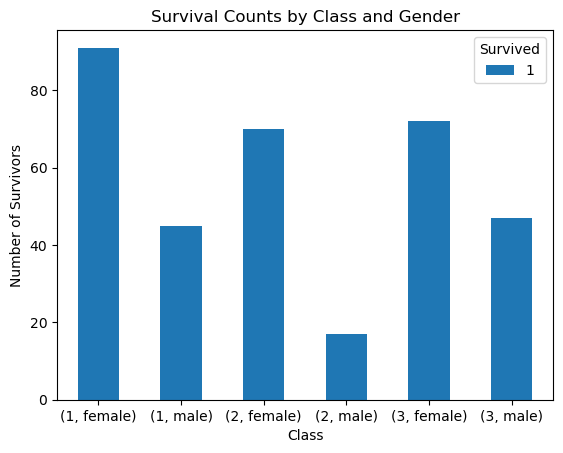

In [18]:
grouped_data.plot(kind='bar', stacked=True)
plt.title('Survival Counts by Class and Gender')
plt.xlabel('Class')
plt.ylabel('Number of Survivors')
plt.xticks(rotation=0)
plt.show()

In [28]:
sibsp_df = train[train['Survived'] == 1]
group_df = sibsp_df.groupby(['SibSp', 'Sex']).size().unstack()
group_df

Sex,female,male
SibSp,,
0,137.0,73.0
1,80.0,32.0
2,10.0,3.0
3,4.0,NaN
4,2.0,1.0


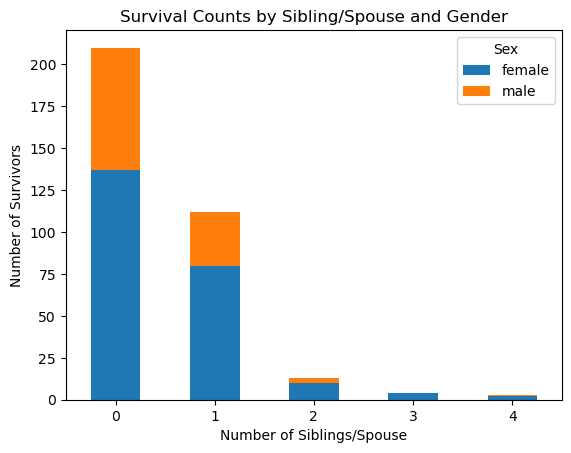

In [29]:
group_df.plot(kind='bar', stacked=True)
plt.title('Survival Counts by Sibling/Spouse and Gender')
plt.xlabel('Number of Siblings/Spouse')
plt.ylabel('Number of Survivors')
plt.xticks(rotation=0)
plt.show()

In [30]:
parch_df = train[train['Survived']==1]
group_df = parch_df.groupby(['Parch', 'Sex']).size().unstack()
group_df

Sex,female,male
Parch,,
0,153.0,80.0
1,46.0,19.0
2,30.0,10.0
3,3.0,NaN
5,1.0,NaN


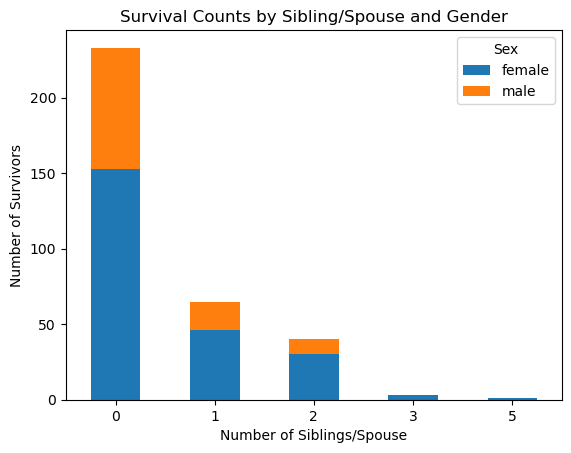

In [31]:
group_df.plot(kind='bar', stacked=True)
plt.title('Survival Counts by Sibling/Spouse and Gender')
plt.xlabel('Number of Siblings/Spouse')
plt.ylabel('Number of Survivors')
plt.xticks(rotation=0)
plt.show()

In [32]:
correlation_matrix = train.corr()
correlation_matrix

C:\Users\User\AppData\Local\Temp\ipykernel_14068\2296058775.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


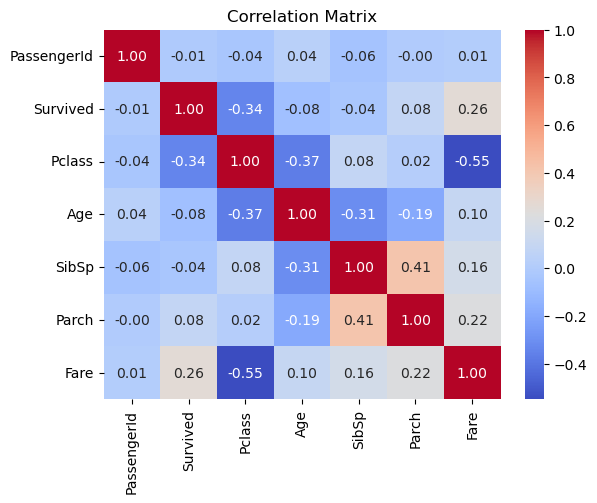

In [34]:
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

In [35]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X,y=None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy = 'mean')
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [56]:
class FeatureEncoder (BaseEstimator, TransformerMixin):
    def fit(self, X,y=None):
        return self
    
    def transform(self,X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        
        column_names=['C','S','Q','N']
        print(len(column_names))
        
        for i in range(len(matrix.T)):
            X[column_names[i]]= matrix.T[i]
            
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        
        column_names=['female', 'male']
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        return X

In [57]:
class FeatureDropper(BaseEstimator,TransformerMixin):
    
    def fit(self,X,y=None):
        return self
        
    def transform(self,X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"],axis=1,errors="ignore")

In [58]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('ageimputer', AgeImputer()),
                    ('featureencoder', FeatureEncoder()),
                    ('featuredropper', FeatureDropper())])

In [59]:
train_df = pipeline.fit_transform(train)

4


In [60]:
train_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,female,male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   C            891 non-null    float64
 8   S            891 non-null    float64
 9   Q            891 non-null    float64
 10  female       891 non-null    float64
 11  male         891 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 83.7 KB


In [66]:
test_df = pipeline.fit_transform(test)

4


In [68]:
test_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,female,male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [69]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   female       418 non-null    float64
 10  male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


## Modelling

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = train_df.drop(['Survived'], axis = 1)
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_data = scaler.fit_transform(X_train)
y_train_data = y_train.to_numpy()
X_test_data = scaler.fit_transform(X_test)
y_test_data = y_test.to_numpy()

In [78]:
X_train_data

array([[-0.57573547, -1.62051704,  0.0171447 , ...,  0.60040719,
        -0.72224656,  0.72224656],
       [ 1.6969464 ,  0.80934914, -0.34431976, ...,  0.60040719,
        -0.72224656,  0.72224656],
       [-0.7735286 , -0.40558395, -0.42124153, ...,  0.60040719,
         1.38456873, -1.38456873],
       ...,
       [ 1.60386728,  0.80934914,  0.88642859, ...,  0.60040719,
        -0.72224656,  0.72224656],
       [-0.04440882, -1.62051704, -1.19045925, ...,  0.60040719,
         1.38456873, -1.38456873],
       [-1.33588162, -1.62051704, -0.65200684, ...,  0.60040719,
        -0.72224656,  0.72224656]])

In [79]:
y_train_data

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [81]:
clf = RandomForestClassifier()
param_gird= [{"n_estimators":[10,100,200,500],"max_depth":[None,5,20],"min_samples_split":[2,3,4]}]
grid_search=GridSearchCV(clf,param_gird,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_train_data,y_train_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 20],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [82]:
final_clf = grid_search.best_estimator_

In [83]:
final_clf

RandomForestClassifier(max_depth=5, min_samples_split=3)

In [84]:
final_clf.score( X_test_data, y_test_data)

0.8071748878923767

In [85]:
test_data = pipeline.fit_transform(test)
test_data

4


,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,female,male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [90]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
C              0
S              0
Q              0
female         0
male           0
dtype: int64

In [91]:
test_data = test_data.ffill()

In [92]:
test_data_scaled = scaler.fit_transform(test_data)
test_data_scaled

array([[-1.72791209,  0.87348191,  0.3349926 , ..., -1.35067551,
        -0.75592895,  0.75592895],
       [-1.71962474,  0.87348191,  1.32553003, ...,  0.74037028,
         1.32287566, -1.32287566],
       [-1.71133739, -0.31581919,  2.51417495, ..., -1.35067551,
        -0.75592895,  0.75592895],
       ...,
       [ 1.71133739,  0.87348191,  0.65196458, ...,  0.74037028,
        -0.75592895,  0.75592895],
       [ 1.71962474,  0.87348191,  0.        , ...,  0.74037028,
        -0.75592895,  0.75592895],
       [ 1.72791209,  0.87348191,  0.        , ..., -1.35067551,
        -0.75592895,  0.75592895]])

In [93]:
predictions = final_clf.predict(test_data_scaled)

In [94]:
final_df = pd.DataFrame(test['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("prediction.csv", index = False)

In [95]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
